In [2]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, InputLayer

In [3]:
# what we need from data


(x_tr, y_tr), (x_te, y_te) = cifar10.load_data()


# after getting data
# as we know the image are colord

# so we need to convert to grayscale

# but firstly we need to normalize


x_tr = x_tr[:10000].astype('float32') / 255.0
x_te = x_te[:10000].astype('float32') / 255.0



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# Convert to grayscale

x_train = tf.image.rgb_to_grayscale(x_tr)
x_test = tf.image.rgb_to_grayscale(x_te)


In [5]:
cnn_model = Sequential()

cnn_model.add(InputLayer((32,32,1)))
cnn_model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
cnn_model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
cnn_model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
cnn_model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
cnn_model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
cnn_model.add(Conv2D(3, (3,3), activation='sigmoid', padding='same'))



cnn_model.compile(optimizer='adam', loss='mse')


In [8]:
# training the cnn


cnn_model.fit(x_train, x_tr, epochs=100, batch_size=128)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0054
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0055
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0052
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0053
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0053
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0053
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0053
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0053
Epoch 9/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0053
Epoch 10/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0054
Epoch 11/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0053
Epoch 12/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0053
Epoch 13/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0053
Epoch 14/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0053
Epoch 15/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


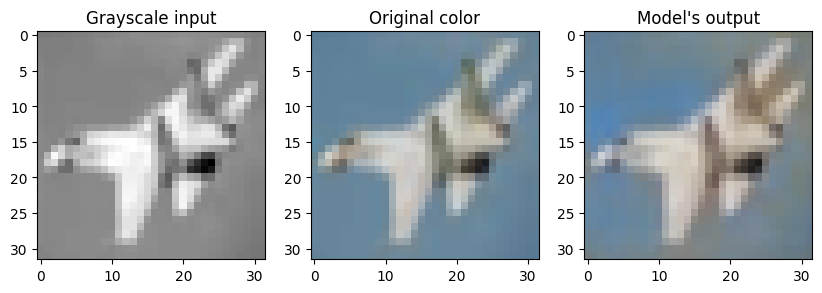

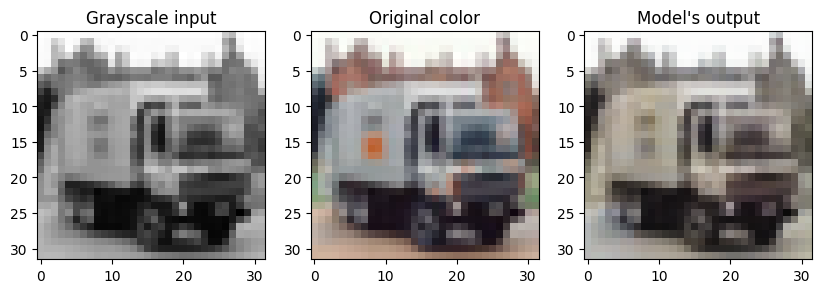

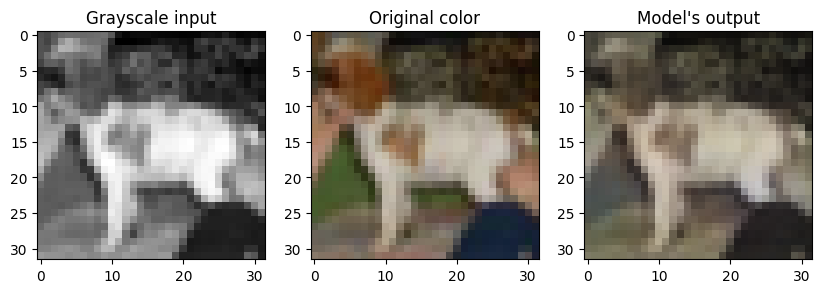

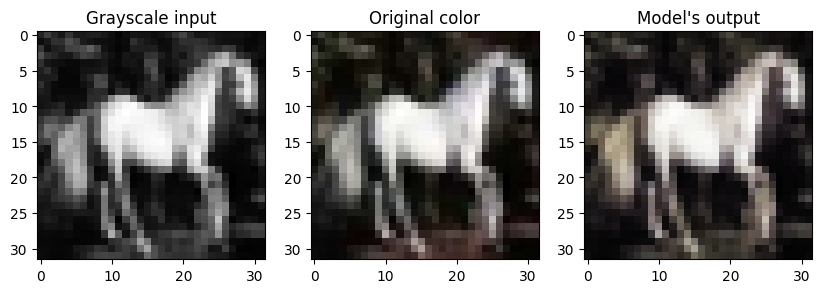

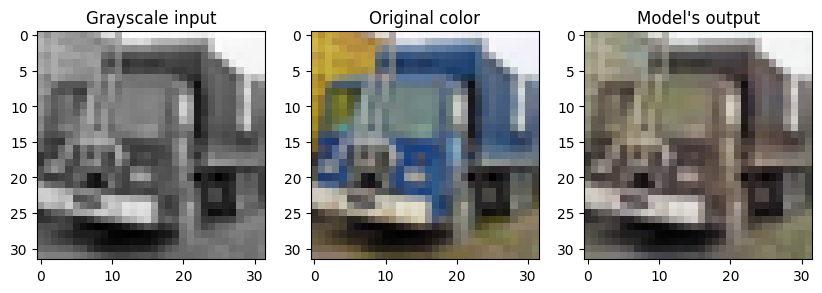

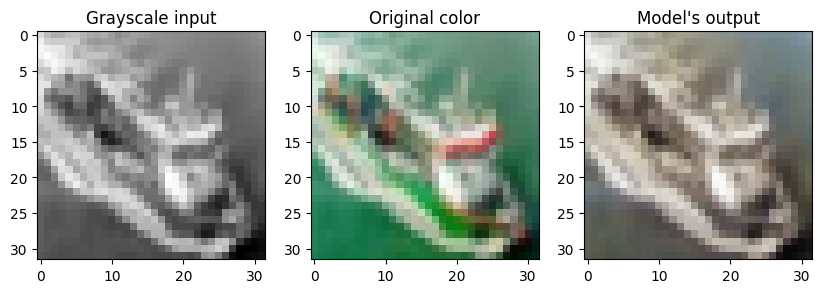

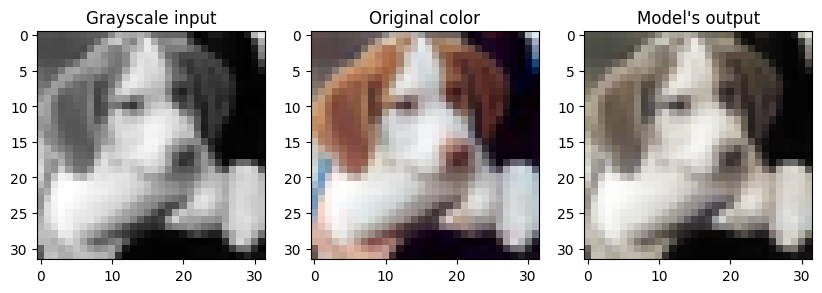

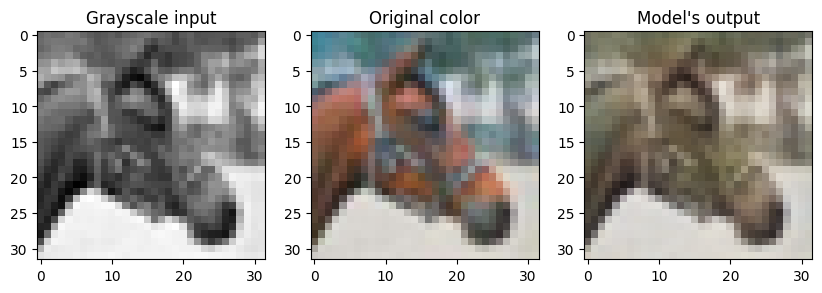

In [19]:
output = cnn_model.predict(x_test[10:18])


for i in range(10,18):
    plt.figure(figsize=(10,4))

    plt.subplot(1, 3, 1)
    plt.imshow(tf.squeeze(x_test[i]), cmap='gray')
    plt.title("Grayscale input")

    plt.subplot(1, 3, 2)
    plt.imshow(x_te[i])
    plt.title("Original color")

    plt.subplot(1, 3, 3)
    plt.imshow(output[i-10])
    plt.title("Model's output")

    plt.show()
